## Lakers data

- LA Lakers 미국 NBA 농구 팀
- NBA 우승 17회를 기록한 명문팀
- 2008 ~ 2009 시즌 경기기록

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(font_scale=1)
import matplotlib.pyplot as plt

plt.style.use('seaborn')

plt.rcParams['axes.unicode_minus'] = False # " - " 기호 Unicode 처리
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 폰트 설정

import warnings
warnings.simplefilter("ignore")

In [2]:
from wordcloud import WordCloud, ImageColorGenerator

### 데이터로드

In [3]:
lakers = pd.read_csv('../../data/dataset/Lakers.csv')
lakers.head()

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y
0,20081028,POR,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,NaN,NaN
1,20081028,POR,home,11:39,1,shot,LAL,Pau Gasol,missed,0,hook,23.0,13.0
2,20081028,POR,home,11:37,1,rebound,LAL,Vladimir Radmanovic,NaN,0,off,NaN,NaN
3,20081028,POR,home,11:25,1,shot,LAL,Derek Fisher,missed,0,layup,25.0,6.0
4,20081028,POR,home,11:23,1,rebound,LAL,Pau Gasol,NaN,0,off,NaN,NaN


- date : 경기일자
- opponent : 상대팀
- game_type : home/away
- time : 시간
- period : 쿼터 (한 쿼터당 12분씩, 동점의 경우 5쿼터 진행)
- etype : 유형(퇴장, 파울, 자유투, 점프볼, 리바운드 ...)
- team : LAL (LA Lakers), 팀명 ...
- player : 선수명
- result : 성공, 실패 여부
- points : 점수
- type : 세부행동
- x, y : 상편 팀 골대 뒤에서 바라본 x, y 좌표 (25, 5.25)

### 데이터탐색

In [5]:
lakers.shape

(34624, 13)

In [4]:
 lakers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34624 entries, 0 to 34623
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       34624 non-null  int64  
 1   opponent   34624 non-null  object 
 2   game_type  34624 non-null  object 
 3   time       34624 non-null  object 
 4   period     34624 non-null  int64  
 5   etype      34624 non-null  object 
 6   team       34624 non-null  object 
 7   player     29231 non-null  object 
 8   result     16888 non-null  object 
 9   points     34624 non-null  int64  
 10  type       24242 non-null  object 
 11  x          13067 non-null  float64
 12  y          13067 non-null  float64
dtypes: float64(2), int64(3), object(8)
memory usage: 3.4+ MB


In [6]:
lakers.describe()

,date,period,points,x,y
count,3.462400e+04,34624.000000,34624.000000,13067.000000,13067.000000
mean,2.008694e+07,2.535524,0.462714,25.317670,13.430550
std,4.372405e+03,1.124725,0.849231,11.185946,8.665827
min,2.008103e+07,1.000000,0.000000,0.000000,3.000000
25%,2.008121e+07,2.000000,0.000000,20.000000,6.000000
50%,2.009012e+07,3.000000,0.000000,25.000000,10.000000
75%,2.009031e+07,4.000000,1.000000,31.000000,20.000000
max,2.009041e+07,5.000000,3.000000,51.000000,90.000000


In [8]:
lakers.describe(include=object)

,opponent,game_type,time,etype,team,player,result,type
count,34624,34624,34624,34624,34624,29231,16888,24242
unique,29,2,717,10,31,370,2,73
top,DEN,home,0:00,shot,LAL,Kobe Bryant,made,def
freq,1855,17471,357,13108,17235,2945,8916,4768


In [7]:
lakers.isnull().sum()

date             0
opponent         0
game_type        0
time             0
period           0
etype            0
team             0
player        5393
result       17736
points           0
type         10382
x            21557
y            21557
dtype: int64

In [11]:
print("opponent : ", lakers['opponent'].unique())
print("game_type : ", lakers['game_type'].unique())
print("time : ", lakers['time'].unique())
print("etype : ", lakers['etype'].unique())
print("team : ", lakers['team'].unique())
print("player : ", lakers['player'].unique())
print("result : ", lakers['result'].unique())
print("type : ", lakers['type'].unique())

opponent :  ['POR' 'LAC' 'DEN' 'HOU' 'DAL' 'DET' 'CHI' 'PHX' 'SAC' 'NJN' 'TOR' 'IND'
 'PHI' 'WAS' 'MIL' 'MIN' 'NYK' 'MIA' 'ORL' 'MEM' 'NOH' 'BOS' 'UTA' 'GSW'
 'SAS' 'CLE' 'OKC' 'ATL' 'CHA']
game_type :  ['home' 'away']
time :  ['12:00' '11:39' '11:37' '11:25' '11:23' '11:22' '11:00' '10:53' '10:45'
 '10:32' '10:31' '10:21' '10:04' '9:50' '9:48' '9:41' '9:24' '9:21' '9:20'
 '9:11' '9:09' '9:04' '8:51' '8:50' '8:39' '8:38' '8:15' '8:08' '8:07'
 '8:00' '7:49' '7:31' '7:30' '7:24' '7:07' '6:53' '6:40' '6:39' '6:21'
 '6:20' '6:05' '6:04' '5:53' '5:52' '5:50' '5:40' '5:24' '5:22' '5:13'
 '5:12' '5:04' '4:46' '4:44' '4:40' '4:38' '4:37' '4:14' '4:06' '4:05'
 '3:48' '3:47' '3:46' '3:34' '3:32' '3:24' '3:23' '3:21' '3:09' '3:08'
 '3:03' '3:00' '2:52' '2:32' '2:31' '2:11' '1:49' '1:31' '1:18' '1:12'
 '0:59' '0:58' '0:48' '0:47' '0:35' '0:33' '0:29' '0:12' '0:00' '11:36'
 '11:35' '11:15' '11:12' '10:51' '10:39' '10:19' '10:14' '10:06' '9:45'
 '9:28' '9:27' '9:10' '9:03' '9:02' '8:59' '8:58' '8:41

In [31]:
print(f"총 데이터 개수 : {lakers.shape[0] * lakers.shape[1]}")
print(f'총 결측치 수 {lakers.isnull().sum().sum()} : 전체 데이터의 {(lakers.isnull().sum().sum() / (lakers.shape[0] * lakers.shape[1])) * 100}%')
print(f'LA 레이커스와 경기한 팀의 수 : {lakers["opponent"].nunique()}')
print(f'경기에 등장하는 행동 수 : {lakers["etype"].nunique()}')
print(f'경기에 등장하는 세부행동 수 : {lakers["type"].nunique()}')

총 데이터 개수 : 450112
총 결측치 수 76625 : 전체 데이터의 17.023540807621217%
LA 레이커스와 경기한 팀의 수 : 29
경기에 등장하는 행동 수 : 10
경기에 등장하는 세부행동 수 : 73


### 데이터 전처리

#### date, time 컬럼 변환한 후 하나의 컬럼 생성

In [90]:
# date 컬럼 str 타입으로 변경
lakers['date'] = lakers['date'].astype('str')

In [36]:
# datetime = 'date' + ' ' + time
lakers['datetime'] = lakers['date'] + ' ' + lakers['time']

In [37]:
lakers.head()

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y,datetime
0,20081028,POR,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,NaN,NaN,20081028 12:00
1,20081028,POR,home,11:39,1,shot,LAL,Pau Gasol,missed,0,hook,23.0,13.0,20081028 11:39
2,20081028,POR,home,11:37,1,rebound,LAL,Vladimir Radmanovic,NaN,0,off,NaN,NaN,20081028 11:37
3,20081028,POR,home,11:25,1,shot,LAL,Derek Fisher,missed,0,layup,25.0,6.0,20081028 11:25
4,20081028,POR,home,11:23,1,rebound,LAL,Pau Gasol,NaN,0,off,NaN,NaN,20081028 11:23


#### 결측치 처리

In [45]:
# x, y 컬럼에 NaN 을 0으로 채우기
lakers['x'].fillna(0, inplace=True)
lakers['y'].fillna(0, inplace=True)

In [46]:
lakers.isnull().sum()

date             0
opponent         0
game_type        0
time             0
period           0
etype            0
team             0
player        5393
result       17736
points           0
type         10382
x                0
y                0
datetime         0
dtype: int64

### EDA & Visualization

- LA Lakers 의 홈경기 vs 원정경기 비율 ?
- 경기에서 선수들이 가장 많이 하는 행동유형 (etype) ?
- 이번 시즌에서 경기 결과는 ?
- LA 레이커스 선수들은 코트의 어느 위치에서 어떤 동작을 했는가 ?

#### 홈경기 vs 원정경기
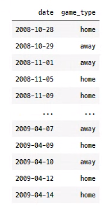

In [47]:
lakers.groupby('game_type').count()

,date,opponent,time,period,etype,team,player,result,points,type,x,y,datetime
game_type,,,,,,,,,,,,,
away,17153,17153,17153,17153,17153,17153,14421,8364,17153,11985,17153,17153,17153
home,17471,17471,17471,17471,17471,17471,14810,8524,17471,12257,17471,17471,17471


In [49]:
df1 = lakers.drop_duplicates(['date'], keep='first')

In [50]:
df1

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y,datetime
0,20081028,POR,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,0.0,0.0,20081028 12:00
416,20081029,LAC,away,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,0.0,0.0,20081029 12:00
871,20081101,DEN,away,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,0.0,0.0,20081101 12:00
1364,20081105,LAC,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,0.0,0.0,20081105 12:00
1867,20081109,HOU,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,0.0,0.0,20081109 12:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32345,20090407,SAC,away,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,0.0,0.0,20090407 12:00
32782,20090409,DEN,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,0.0,0.0,20090409 12:00
33280,20090410,POR,away,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,0.0,0.0,20090410 12:00
33746,20090412,MEM,home,12:00,1,jump ball,OFF,NaN,NaN,0,NaN,0.0,0.0,20090412 12:00


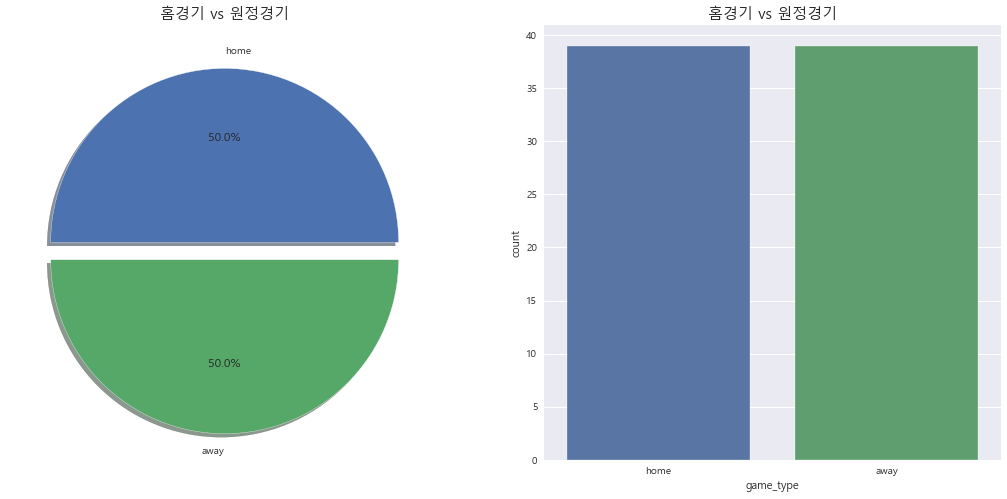

In [55]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# 원 차트
df1['game_type'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax[0], shadow=True, explode=[0,0.1])
ax[0].set_title("홈경기 vs 원정경기", size=15)
ax[0].set_ylabel('')

# count plot
sns.countplot('game_type', data=df1, ax=ax[1])
ax[1].set_title("홈경기 vs 원정경기", size=15)

plt.show()

#### 경기에서 선수들이 가장많이 하는 행동유형(etype) ?

In [60]:
lakers['etype'].value_counts()

shot          13108
rebound        7971
free throw     3780
foul           3417
sub            2891
turnover       2261
timeout         950
jump ball       131
violation       114
ejection          1
Name: etype, dtype: int64

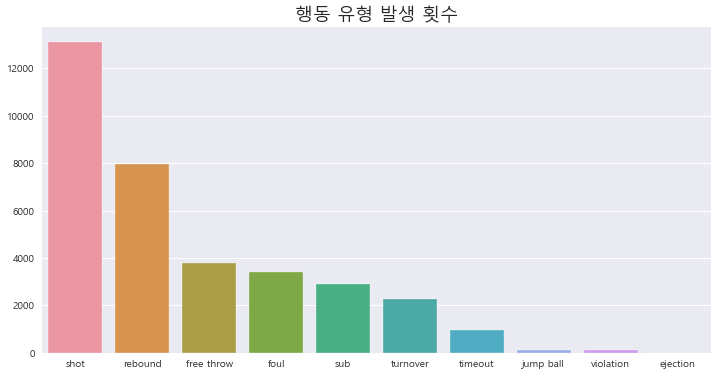

In [66]:
plt.figure(figsize=(12, 6))
sns.barplot(x=lakers['etype'].value_counts().index, y=lakers['etype'].value_counts().values)
plt.title('행동 유형 발생 횟수', fontsize=18)
plt.show()

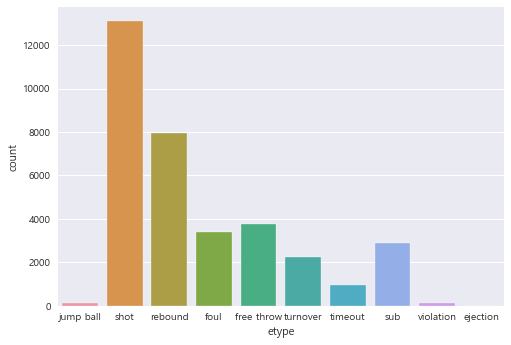

In [68]:
sns.countplot(data=lakers, x='etype');

#### 특정쿼터에서 많이 발생한 행동
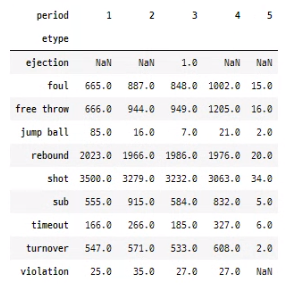

In [81]:
lakers.groupby(['etype', 'period']).size().unstack()

period,1,2,3,4,5
etype,,,,,
ejection,NaN,NaN,1.0,NaN,NaN
foul,665.0,887.0,848.0,1002.0,15.0
free throw,666.0,944.0,949.0,1205.0,16.0
jump ball,85.0,16.0,7.0,21.0,2.0
rebound,2023.0,1966.0,1986.0,1976.0,20.0
shot,3500.0,3279.0,3232.0,3063.0,34.0
sub,555.0,915.0,584.0,832.0,5.0
timeout,166.0,266.0,185.0,327.0,6.0
turnover,547.0,571.0,533.0,608.0,2.0


In [85]:
df2 = lakers.groupby(['etype', 'period']).size().reset_index().pivot_table(index='etype', columns='period', values=0)
df2

period,1,2,3,4,5
etype,,,,,
ejection,NaN,NaN,1.0,NaN,NaN
foul,665.0,887.0,848.0,1002.0,15.0
free throw,666.0,944.0,949.0,1205.0,16.0
jump ball,85.0,16.0,7.0,21.0,2.0
rebound,2023.0,1966.0,1986.0,1976.0,20.0
shot,3500.0,3279.0,3232.0,3063.0,34.0
sub,555.0,915.0,584.0,832.0,5.0
timeout,166.0,266.0,185.0,327.0,6.0
turnover,547.0,571.0,533.0,608.0,2.0


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'ejection'),
  Text(1, 0, 'foul'),
  Text(2, 0, 'free throw'),
  Text(3, 0, 'jump ball'),
  Text(4, 0, 'rebound'),
  Text(5, 0, 'shot'),
  Text(6, 0, 'sub'),
  Text(7, 0, 'timeout'),
  Text(8, 0, 'turnover'),
  Text(9, 0, 'violation')])

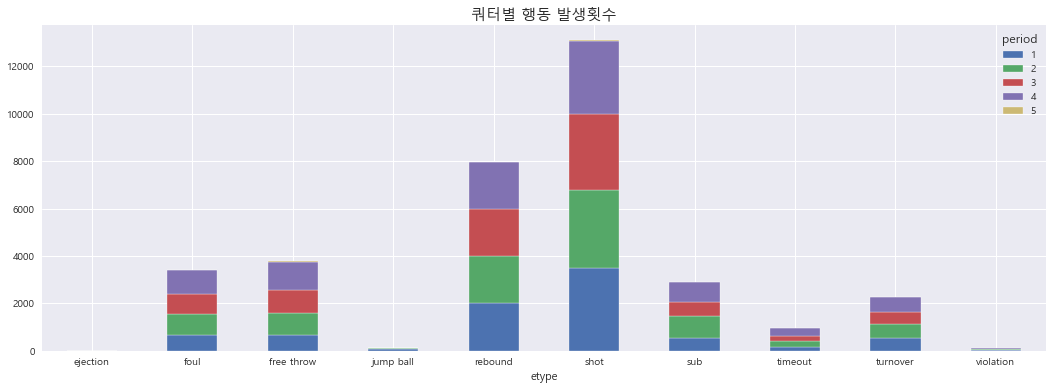

In [88]:
df2.plot(kind='bar', stacked=True, figsize=(18, 6));
plt.title('쿼터별 행동 발생횟수', size=15)
plt.xticks(rotation=0)

#### 이번 시즌 경기 결과는?

In [92]:
# 날짜별 경기 결과에서 result 컬럼의 value 가 made 인 points 만 더하면 총 점수
lakers[lakers['result'].isin(['made'])]

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y,datetime
5,20081028,POR,home,11:22,1,shot,LAL,Pau Gasol,made,2,hook,25.0,10.0,20081028 11:22
7,20081028,POR,home,11:22,1,free throw,LAL,Pau Gasol,made,1,NaN,0.0,0.0,20081028 11:22
9,20081028,POR,home,10:53,1,shot,POR,LaMarcus Aldridge,made,2,jump,36.0,21.0,20081028 10:53
10,20081028,POR,home,10:45,1,shot,LAL,Derek Fisher,made,2,pullup jump,30.0,21.0,20081028 10:45
13,20081028,POR,home,10:21,1,shot,LAL,Pau Gasol,made,2,jump,15.0,17.0,20081028 10:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34609,20090414,UTA,home,1:52,4,shot,LAL,Andrew Bynum,made,2,dunk,25.0,6.0,20090414 1:52
34616,20090414,UTA,home,0:54,4,free throw,LAL,Andrew Bynum,made,1,NaN,0.0,0.0,20090414 0:54
34617,20090414,UTA,home,0:54,4,free throw,LAL,Andrew Bynum,made,1,NaN,0.0,0.0,20090414 0:54
34619,20090414,UTA,home,0:42,4,free throw,UTA,Kyle Korver,made,1,NaN,0.0,0.0,20090414 0:42


In [95]:
df3 = lakers.query('result == "made"').groupby(['date', 'team'])[['points']].sum().reset_index()
df3

,date,team,points
0,20081028,LAL,96
1,20081028,POR,76
2,20081029,LAC,79
3,20081029,LAL,117
4,20081101,DEN,97
...,...,...,...
151,20090410,POR,106
152,20090412,LAL,92
153,20090412,MEM,75
154,20090414,LAL,125


#### 3) LA Lakers 와 상대편으로 경기 결과 나누기

In [98]:
lal = df3.query("team == 'LAL'")
opp = df3.query("team != 'LAL'")

In [99]:
lal.head(3)

,date,team,points
0,20081028,LAL,96
3,20081029,LAL,117
5,20081101,LAL,104


In [100]:
opp.head(3)

,date,team,points
1,20081028,POR,76
2,20081029,LAC,79
4,20081101,DEN,97


#### 4) 경기 결과 merge

In [102]:
df4 = pd.merge(lal, opp, on='date')
df4

,date,team_x,points_x,team_y,points_y
0,20081028,LAL,96,POR,76
1,20081029,LAL,117,LAC,79
2,20081101,LAL,104,DEN,97
3,20081105,LAL,106,LAC,88
4,20081109,LAL,111,HOU,82
...,...,...,...,...,...
73,20090407,LAL,122,SAC,104
74,20090409,LAL,116,DEN,102
75,20090410,LAL,98,POR,106
76,20090412,LAL,92,MEM,75


In [106]:
# LA Lakers가 이긴날 진날을 알아본 후 출력
win = df4[df4['points_x'] > df4['points_y']]
los = df4[df4['points_x'] < df4['points_y']]
# 08-09 시즌에 LA Lakers는 총 {} 회의 경기중 {}번 승리했다
print(f"08-09 시즌에 LA Lakers는 총 {df4.shape[0]} 회의 경기중 {win.shape[0]}번 승리했다")

08-09 시즌에 LA Lakers는 총 78 회의 경기중 63번 승리했다


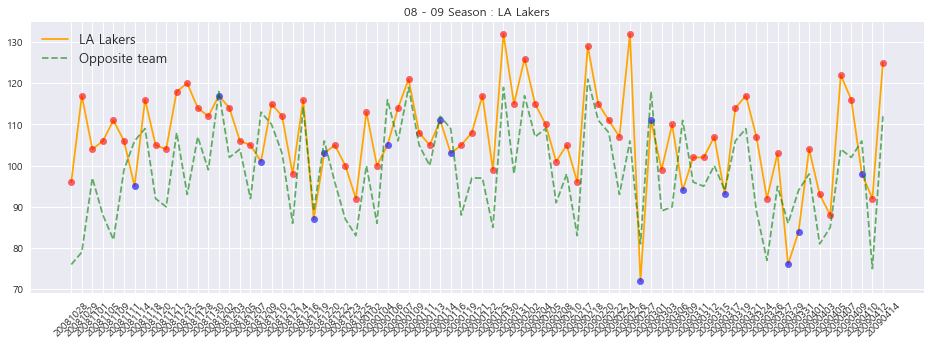

In [108]:
plt.figure(figsize=(16, 5))

plt.title("08 - 09 Season : LA Lakers")

plt.plot(lal['date'], lal['points'], "-", alpha=1, color="orange", label="LA Lakers")

plt.plot(win['date'], win['points_x'], 'o', alpha=0.6, color='red')
plt.plot(los['date'], los['points_x'], 'o', alpha=0.6, color='blue')
plt.plot(opp['date'], opp['points'], '--', alpha=0.6, color='green', label='Opposite team')

plt.legend(loc='upper left', fontsize=13)
plt.xticks(rotation=45)

plt.show()

### LA Lakers 선수들의 코트 위치별 동작

In [110]:
df5 = lakers.query('team == "LAL"')
df5

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y,datetime
1,20081028,POR,home,11:39,1,shot,LAL,Pau Gasol,missed,0,hook,23.0,13.0,20081028 11:39
2,20081028,POR,home,11:37,1,rebound,LAL,Vladimir Radmanovic,NaN,0,off,0.0,0.0,20081028 11:37
3,20081028,POR,home,11:25,1,shot,LAL,Derek Fisher,missed,0,layup,25.0,6.0,20081028 11:25
4,20081028,POR,home,11:23,1,rebound,LAL,Pau Gasol,NaN,0,off,0.0,0.0,20081028 11:23
5,20081028,POR,home,11:22,1,shot,LAL,Pau Gasol,made,2,hook,25.0,10.0,20081028 11:22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34616,20090414,UTA,home,0:54,4,free throw,LAL,Andrew Bynum,made,1,NaN,0.0,0.0,20090414 0:54
34617,20090414,UTA,home,0:54,4,free throw,LAL,Andrew Bynum,made,1,NaN,0.0,0.0,20090414 0:54
34618,20090414,UTA,home,0:42,4,foul,LAL,Luke Walton,NaN,0,personal,0.0,0.0,20090414 0:42
34621,20090414,UTA,home,0:27,4,turnover,LAL,Andrew Bynum,NaN,0,NaN,0.0,0.0,20090414 0:27


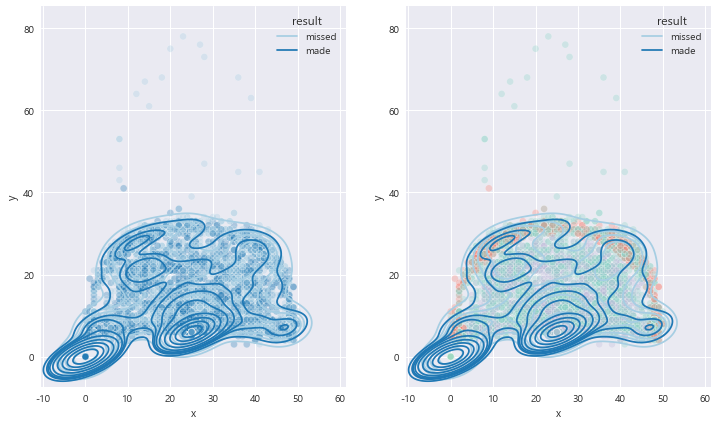

In [113]:
f, ax = plt.subplots(1, 2, figsize=(12, 7))

# 득점 성공 / 실패 분포
g1 = sns.scatterplot(data=df5, x='x', y='y', hue='result', alpha=0.3, palette='Paired', ax=ax[0])
g2 = sns.kdeplot(data=df5, x='x', y='y', hue='result', palette='Paired', ax=ax[0])

g3 = sns.scatterplot(data=df5, x='x', y='y', hue='points', alpha=0.3, palette='Set3', ax=ax[1])
g4 = sns.kdeplot(data=df5, x='x', y='y', hue='result', palette='Paired', ax=ax[1])

plt.show()

#### 세부 행동 별 위치

In [115]:
# 가장많이 한 세부행동 10개
lal2 = lakers.query('team == "LAL"')

lal2['type'].value_counts()[:10]

def              2464
jump             2114
3pt              1434
layup            1017
off               962
shooting          758
personal          635
regular           311
driving layup     307
hook              174
Name: type, dtype: int64

In [119]:
lal3 = lal2[lal2['type'].isin(lal2['type'].value_counts().head(10).index)]
lal3

,date,opponent,game_type,time,period,etype,team,player,result,points,type,x,y,datetime
1,20081028,POR,home,11:39,1,shot,LAL,Pau Gasol,missed,0,hook,23.0,13.0,20081028 11:39
2,20081028,POR,home,11:37,1,rebound,LAL,Vladimir Radmanovic,NaN,0,off,0.0,0.0,20081028 11:37
3,20081028,POR,home,11:25,1,shot,LAL,Derek Fisher,missed,0,layup,25.0,6.0,20081028 11:25
4,20081028,POR,home,11:23,1,rebound,LAL,Pau Gasol,NaN,0,off,0.0,0.0,20081028 11:23
5,20081028,POR,home,11:22,1,shot,LAL,Pau Gasol,made,2,hook,25.0,10.0,20081028 11:22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34603,20090414,UTA,home,2:12,4,shot,LAL,Jordan Farmar,missed,0,jump,40.0,7.0,20090414 2:12
34605,20090414,UTA,home,2:06,4,foul,LAL,Jordan Farmar,NaN,0,shooting,0.0,0.0,20090414 2:06
34611,20090414,UTA,home,1:27,4,rebound,LAL,Josh Powell,NaN,0,def,0.0,0.0,20090414 1:27
34618,20090414,UTA,home,0:42,4,foul,LAL,Luke Walton,NaN,0,personal,0.0,0.0,20090414 0:42


<AxesSubplot:xlabel='x', ylabel='y'>

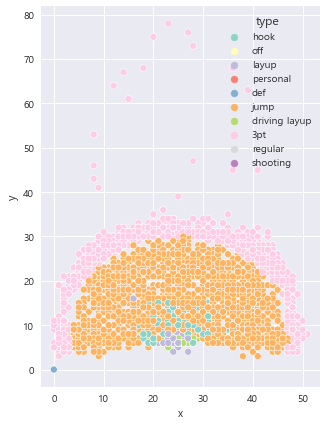

In [122]:
plt.figure(figsize=(5,7))
sns.scatterplot(data=lal3, x='x', y='y', hue='type', palette='Set3')